In [ ]:
from clipppy import load_config
from matplotlib import pyplot as plt
import torch, pyro, numpy as np 
import collections, os
import corner

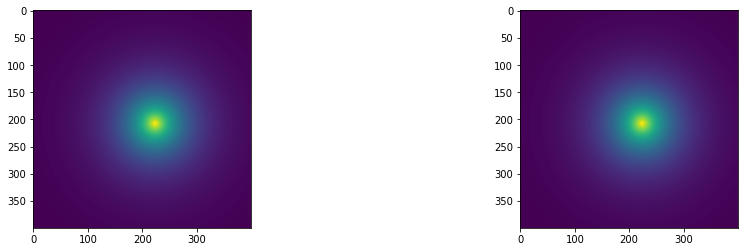

In [2]:
config = load_config('config_fit_lens_v2.yaml')
model = config.model
obs = config.conditioning['obs']

fig, axs = plt.subplots(1, 2, figsize = (16, 4))
axs[0].imshow(model())
axs[1].imshow(obs)
plt.show()

# plt.imshow( model() )

In [3]:
guide = config.guide

guide.setup()

losses = []

guide.train() # g and src_alpha are trained
losses += config.fit(lr=1e-2, n_steps=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

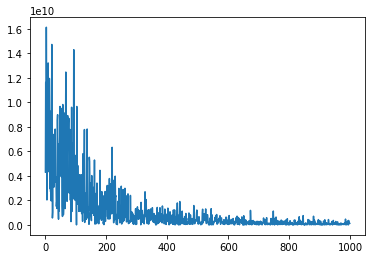

In [4]:
plt.plot(losses)

In [5]:
# ppd = config.ppd(plate_stack = [100])

# ppd['model_trace'].nodes['x']['value'].detach().numpy()
# ppd['model_trace'].nodes['y']['value'].detach().numpy()

# fig, axs = plt.subplots(1, 2, figsize = (8, 2))
# axs[0].hist(np.array(pred_x))
# axs[1].hist(np.array(pred_y))
# plt.show()

In [ ]:
# ppd = config.ppd(plate_stack = [100])

# ppd['model_trace'].nodes['x']['value'].detach().numpy()
# ppd['model_trace'].nodes['y']['value'].detach().numpy()

# fig, axs = plt.subplots(1, 2, figsize = (8, 2))
# axs[0].hist(np.array(pred_x))
# axs[1].hist(np.array(pred_y))
# plt.show()

# fig, axs = plt.subplots(1, 2, figsize = (8, 2))
# axs[0].hist(ppd['x'])
# axs[0].plot()
# axs[1].hist(ppd['y'])
# plt.show()

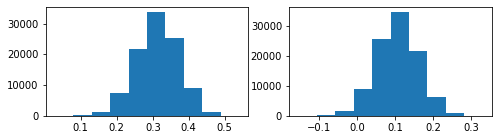

In [6]:
with pyro.plate('plate', 100000):
    ppd = config.guide()
    
param_names = []
for k, v in ppd.items():
    ppd[k] = v.detach().numpy()
    param_names.append(k)
    
# pred_x = ppd['x'].detach().numpy()
# pred_y = ppd['y'].detach().numpy()

fig, axs = plt.subplots(1, 2, figsize = (8, 2))
axs[0].hist(ppd['x'])
axs[0].plot()
axs[1].hist(ppd['y'])
plt.show()

In [10]:
config.kwargs['params']['truth']

AttributeError: 'dict' object has no attribute 'params'

/home/eliasd/.pyenv/versions/3.9.7/envs/lens-3.9.7/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3361: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


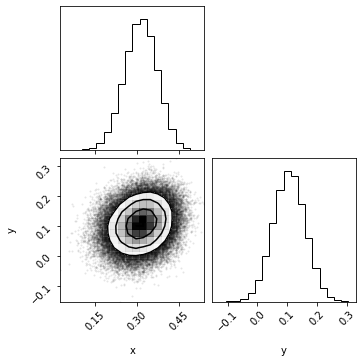

In [7]:
corner.corner(np.stack(ppd.values(), -1), labels=param_names);